In [3]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import pymongo
import datetime
import json
import base64
import time
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
consumer_key = "TqbTZEf7UL5yKuuIwNTFIR3sV"
consumer_secret = "bY3HtJfLi6hmBfaefRMSi8DQzNaIKdvIIJsAmDSLvwdkmoqSM0"
access_token = "4180437988-cKm4LNohEn1F7rY3DRIiPvGuaqAJdfQ6zuOhOsI"
access_token_secret = "Io9pva3uXQguf2P0w20p2aXbG70cXNuF6OSLrA2mwjHnZ"



MONGO_HOST= "mongodb://localhost:27017/"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
try:
    api.verify_credentials()
    print('Successful Authentication!!')
except:
    print('Failed authentication, check the credentials again.')

client = pymongo.MongoClient(MONGO_HOST)
db = client.twitter_db
collection = db.my_collection

Successful Authentication!!


In [2]:
#input parameters

name= input('Please enter the twitter account to search: ')
num = int(input ('Please enter number of tweets required: '))

Please enter the twitter account to search: JoeBiden
Please enter number of tweets required: 400


In [5]:

tweets = tweepy.Cursor(api.user_timeline, id="@"+name,tweet_mode="extended", lang="en").items(num)    
for tweet in tweets:
    status = api.get_status(tweet.id)
    data={}
    data['id']= tweet.id
    data['created']=status.created_at
    data['geo']= tweet.geo
    data['text']=status.text
    data['likes']= status.favorite_count
    data['retweet']= status.retweet_count
    data['location'] = tweet.user.location
    collection.insert(data)
    

Unexpected parameter: id
Unexpected parameter: lang
<ipython-input-5-72c247b8f6e8>:12: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  collection.insert(data)
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
U

In [7]:
tweets=[]
for c in collection.find():
    tweets.append(c)

tweet_df= pd.DataFrame(tweets)
    

In [9]:
tweet_df

,_id,id,created,geo,text,likes,retweet,location
0,62cb327e771a7ce568488ef0,1545388678373150722,2022-07-08 12:45:47,None,Michelle and I send our deepest condolences to...,40528,3211,"Washington, DC"
1,62cb327e771a7ce568488ef1,1545388677307809793,2022-07-08 12:45:47,None,I will always remember the work we did to stre...,41547,3343,"Washington, DC"
2,62cb327e771a7ce568488ef2,1545388676242456576,2022-07-08 12:45:47,None,I am shocked and saddened by the assassination...,212542,21936,"Washington, DC"
3,62cb327e771a7ce568488ef3,1545136326399385601,2022-07-07 20:03:02,None,"Right now, thousands of Ukrainian families are...",9103,1918,"Washington, DC"
4,62cb327e771a7ce568488ef4,1544082823690297350,2022-07-04 22:16:47,None,Michelle and I mourn the passing of Clifford A...,8654,1059,"Washington, DC"
...,...,...,...,...,...,...,...,...
795,62cb464d98083b0d96465dc7,1487128090648227843,2022-01-28 18:19:00,None,After four decades and 28 years on the United ...,13478,1716,"Washington, DC"
796,62cb464d98083b0d96465dc8,1486862338116534279,2022-01-28 00:43:00,None,I’m keeping the commitment I made during my ca...,10819,1746,"Washington, DC"
797,62cb464d98083b0d96465dc9,1486836920927797248,2022-01-27 23:02:00,None,"Last year, we had the fastest economic growth ...",24688,3632,"Washington, DC"
798,62cb464d98083b0d96465dca,1486713091467268102,2022-01-27 14:49:57,None,"RT @POTUS: In 2021, we had the fastest economi...",0,7356,"Washington, DC"


In [10]:
nltk.download('stopwords')
def clean_tweets(tweet):
    a= ''.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|@", " ", str(tweet).lower()).strip())
    return re.sub(' +', ' ', a)

tweet_df["Clean_text"] = tweet_df["text"].map(clean_tweets)
tweet_df["Date"]=tweet_df["created"].apply(lambda x: x.date())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhinayaganesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
tweet_df

,_id,id,created,geo,text,likes,retweet,location,Clean_text,Date
0,62cb327e771a7ce568488ef0,1545388678373150722,2022-07-08 12:45:47,None,Michelle and I send our deepest condolences to...,40528,3211,"Washington, DC",michelle and i send our deepest condolences to...,2022-07-08
1,62cb327e771a7ce568488ef1,1545388677307809793,2022-07-08 12:45:47,None,I will always remember the work we did to stre...,41547,3343,"Washington, DC",i will always remember the work we did to stre...,2022-07-08
2,62cb327e771a7ce568488ef2,1545388676242456576,2022-07-08 12:45:47,None,I am shocked and saddened by the assassination...,212542,21936,"Washington, DC",i am shocked and saddened by the assassination...,2022-07-08
3,62cb327e771a7ce568488ef3,1545136326399385601,2022-07-07 20:03:02,None,"Right now, thousands of Ukrainian families are...",9103,1918,"Washington, DC",right now thousands of ukrainian families are ...,2022-07-07
4,62cb327e771a7ce568488ef4,1544082823690297350,2022-07-04 22:16:47,None,Michelle and I mourn the passing of Clifford A...,8654,1059,"Washington, DC",michelle and i mourn the passing of clifford a...,2022-07-04
...,...,...,...,...,...,...,...,...,...,...
795,62cb464d98083b0d96465dc7,1487128090648227843,2022-01-28 18:19:00,None,After four decades and 28 years on the United ...,13478,1716,"Washington, DC",after four decades and 28 years on the united ...,2022-01-28
796,62cb464d98083b0d96465dc8,1486862338116534279,2022-01-28 00:43:00,None,I’m keeping the commitment I made during my ca...,10819,1746,"Washington, DC",i m keeping the commitment i made during my ca...,2022-01-28
797,62cb464d98083b0d96465dc9,1486836920927797248,2022-01-27 23:02:00,None,"Last year, we had the fastest economic growth ...",24688,3632,"Washington, DC",last year we had the fastest economic growth i...,2022-01-27
798,62cb464d98083b0d96465dca,1486713091467268102,2022-01-27 14:49:57,None,"RT @POTUS: In 2021, we had the fastest economi...",0,7356,"Washington, DC",rt in 2021 we had the fastest economic growth ...,2022-01-27


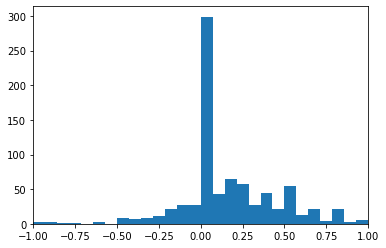

In [12]:
# Bins= auto because this uses the maximum of 
# the Sturges and Freedman-Diaconis bin choice.

tweet_df[['polarity', 'subjectivity']] = tweet_df['Clean_text'].apply(lambda tweet: pd.Series(TextBlob(tweet).sentiment))
plt.xlim(-1,1)
plt.hist(tweet_df['polarity'],bins="auto")
plt.show()

In [13]:
sentiment=[]

for i in range (len(tweet_df)):
    if (tweet_df.polarity[i]>=0 and tweet_df.polarity[i]<=0.25):
        sentiment.append('Neutral')
    elif (tweet_df.polarity[i]<0):
        sentiment.append('Negative')
    else:
        sentiment.append('Positive')

tweet_df['Sentiment']=sentiment
        

In [14]:
tweet_df['Sentiment']

0      Negative
1       Neutral
2      Negative
3       Neutral
4       Neutral
         ...   
795     Neutral
796     Neutral
797     Neutral
798     Neutral
799     Neutral
Name: Sentiment, Length: 800, dtype: object

In [15]:
# COUNT NUMBER OF POSITIVE, NEGATIVE AND NEUTRAL TWEETS

neu_list = []
neg_list = []
pos_list = []
neu=0
pos=0
neg= 0
for i in range(len(tweet_df['Sentiment'])):
    if (tweet_df['Sentiment'][i]=='Neutral'):
        neu=neu+1
    elif (tweet_df['Sentiment'][i]=='Positive'):
        pos=pos+1
    else:
        neg=neg+1
def percent(a,total):
    b=100 * float(a)/float(total)
    return format(b,'.1f')

In [16]:
l= len(tweet_df)
positive = percent(pos,l )
negative = percent(neg, l)
neutral = percent(neu, l)

In [17]:
neutral, positive, negative

('56.2', '28.9', '14.9')

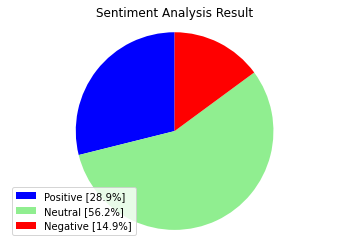

In [18]:
# PIE CHART FOR SENTIMENT ANALYSIS OF TWEETS

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['blue', 'lightgreen','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result')
plt.axis('equal')
plt.show()

In [19]:
a=tweet_df['text']
b= tweet_df['Sentiment']
# b=tweet_df.loc[tweet_df['Sentiment'] == item]
df= pd.DataFrame()
df['text']=a
df['Sentiment']=b
# df=df.append(b)

In [20]:
df

,text,Sentiment
0,Michelle and I send our deepest condolences to...,Negative
1,I will always remember the work we did to stre...,Neutral
2,I am shocked and saddened by the assassination...,Negative
3,"Right now, thousands of Ukrainian families are...",Neutral
4,Michelle and I mourn the passing of Clifford A...,Neutral
...,...,...
795,After four decades and 28 years on the United ...,Neutral
796,I’m keeping the commitment I made during my ca...,Neutral
797,"Last year, we had the fastest economic growth ...",Neutral
798,"RT @POTUS: In 2021, we had the fastest economi...",Neutral


In [21]:
tweet_dict={}
# df.reset_index(inplace=True)
tweet_dict= df.to_dict("records")
# collect= db.final_collection
# collect.insert_one(tweet_dict)

In [20]:
# tweet_dict

In [22]:
collect= db.final_collection
collect.insert_many(tweet_dict)

In [29]:
# TWEETS WITH HASHTAG

hashtag = input('Please enter keyword or hashtag to search: ')

c= db.hashtag
# geoc="38.9072,-77.0369,6mi"
for tweeet in tweepy.Cursor(api.search_tweets, q="#"+hashtag, count=400, lang="en").items(num):
    status = api.get_status(tweeet.id)
    t={}
    t['id']= tweeet.id
    t['created']=status.created_at
    t['geo']= tweeet.geo
    t['text']=status.text
    t['likes']= status.favorite_count
    t['retweet']= status.retweet_count
    t['location'] = tweeet.user.location
    c.insert(t)
    
    

Please enter keyword or hashtag to search: world


<ipython-input-29-c77f8beacc45>:17: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  c.insert(t)


In [30]:
twee=[]
for v in c.find():
    twee.append(v)

tweet_hashtag= pd.DataFrame(twee)

In [34]:
tweet_hashtag

,_id,id,created,geo,text,likes,retweet,location,Clean_text,Date
0,62cb535c98083b0d9646640c,1546260821977825283,2022-07-10 22:31:22,None,RT @GlamChannelUSA: Next Canada ✈️🇨🇦🍁 #Travel ...,0,2,,rt next canada travel journey allaroundtheworl...,2022-07-10
1,62cb535c98083b0d9646640d,1546260797814358016,2022-07-10 22:31:16,None,A 14-year-old is fatally stabbed at a train st...,0,0,Česká republika,a 14 year old is fatally stabbed at a train st...,2022-07-10
2,62cb535c98083b0d9646640e,1546260797768220672,2022-07-10 22:31:16,None,How the climate crisis is forever changing our...,0,0,Česká republika,how the climate crisis is forever changing our...,2022-07-10
3,62cb535c98083b0d9646640f,1546260751114985472,2022-07-10 22:31:05,None,Earth right now: Sunday 10:31pm UTC. #earth #w...,0,0,Earth,earth right now sunday 10 31pm utc earth world...,2022-07-10
4,62cb535c98083b0d96466410,1546260699088814081,2022-07-10 22:30:53,None,German Cardinal Reinhard Marx Wants Female Dea...,0,0,"Toronto, canada",german cardinal reinhard marx wants female dea...,2022-07-10
...,...,...,...,...,...,...,...,...,...,...
395,62cb539d98083b0d96466597,1546191603676610561,2022-07-10 17:56:19,None,RT @Huseyn_jafari: متوجه شدین؟\nDo you underst...,0,17,,rt jafari do you understand or should i contin...,2022-07-10
396,62cb539d98083b0d96466598,1546191033289117696,2022-07-10 17:54:03,None,RT @Huseyn_jafari: متوجه شدین؟\nDo you underst...,0,17,sulduz,rt jafari do you understand or should i contin...,2022-07-10
397,62cb539e98083b0d96466599,1546190870742855680,2022-07-10 17:53:25,None,RT @EarthKeeper22: Do what you can - With what...,0,55,India,rt do what you can with what you have where yo...,2022-07-10
398,62cb539e98083b0d9646659a,1546190791667744768,2022-07-10 17:53:06,None,Welcome To DJCriscodance Sunday Tea Dance Mix ...,1,1,U.S.A.,welcome to djcriscodance sunday tea dance mix ...,2022-07-10


In [33]:
nltk.download('stopwords')
def clean_tweets(tweet):
    a= ''.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|@", " ", str(tweet).lower()).strip())
    return re.sub(' +', ' ', a)

tweet_hashtag["Clean_text"] = tweet_hashtag["text"].map(clean_tweets)
tweet_hashtag["Date"]=tweet_hashtag["created"].apply(lambda x: x.date())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhinayaganesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


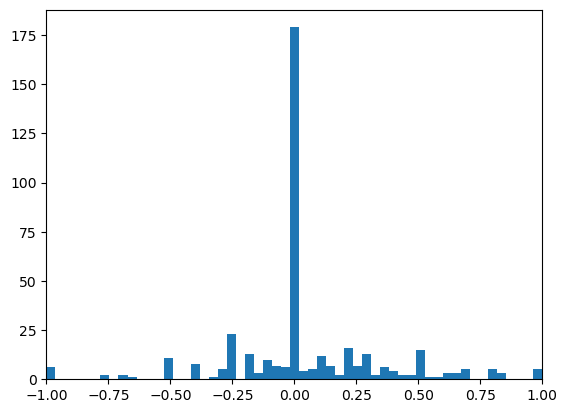

In [35]:
# Bins= auto because this uses the maximum of 
# the Sturges and Freedman-Diaconis bin choice.

tweet_hashtag[['polarity', 'subjectivity']] = tweet_hashtag['Clean_text'].apply(lambda tweet: pd.Series(TextBlob(tweet).sentiment))
plt.xlim(-1,1)
plt.hist(tweet_hashtag['polarity'],bins="auto")
plt.show()

In [36]:
sentiment=[]

for i in range (len(tweet_hashtag)):
    if (tweet_hashtag.polarity[i]>=0 and tweet_hashtag.polarity[i]<=0.25):
        sentiment.append('Neutral')
    elif (tweet_hashtag.polarity[i]<0):
        sentiment.append('Negative')
    else:
        sentiment.append('Positive')

tweet_hashtag['Sentiment']=sentiment

# COUNT NUMBER OF POSITIVE, NEGATIVE AND NEUTRAL TWEETS

neu_list = []
neg_list = []
pos_list = []
neu=0
pos=0
neg= 0
for i in range(len(tweet_hashtag['Sentiment'])):
    if (tweet_hashtag['Sentiment'][i]=='Neutral'):
        neu=neu+1
    elif (tweet_hashtag['Sentiment'][i]=='Positive'):
        pos=pos+1
    else:
        neg=neg+1
def percent(a,total):
    b=100 * float(a)/float(total)
    return format(b,'.1f')
        

In [38]:
l= len(tweet_hashtag)
positive = percent(pos,l )
negative = percent(neg, l)
neutral = percent(neu, l)
neutral, positive, negative

('57.8', '17.8', '24.5')

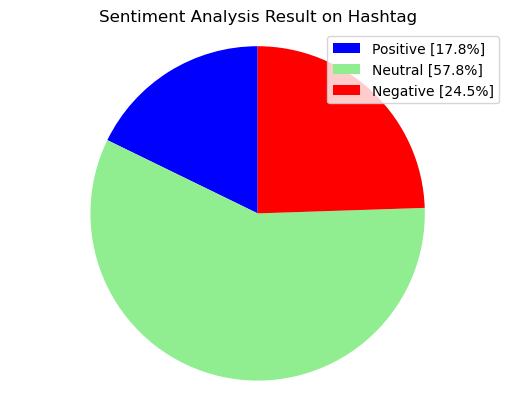

In [40]:
# PIE CHART FOR SENTIMENT ANALYSIS OF TWEETS

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['blue', 'lightgreen','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result on Hashtag')
plt.axis('equal')
plt.show()

In [41]:
a=tweet_hashtag['text']
b= tweet_hashtag['Sentiment']
df1= pd.DataFrame()
df1['text']=a
df1['Sentiment']=b
# df=df.append(b)

tweet_dict={}
# df.reset_index(inplace=True)
tweet_dict= df1.to_dict("records")
# collect= db.final_collection
# collect.insert_one(tweet_dict)

collect= db.final_hashtag
collect.insert_many(tweet_dict)


In [32]:
# tweet_dfs[['lat','long','id']].hist();